In [ ]:
#load datasets from csv
import pandas as pd
train_df=pd.read_csv('/content/drive/MyDrive/PGP Datasets/sign_mnist_train.csv')
valid_df=pd.read_csv('/content/drive/MyDrive/PGP Datasets/sign_mnist_valid.csv')

In [ ]:
#separate our target values
y_train=train_df['label']
y_valid=valid_df['label']

del train_df['label']
del valid_df['label']

In [ ]:
#prepare x
x_train=train_df.values
x_valid=valid_df.values

In [ ]:
import tensorflow.keras as keras
num_classes=24
#encode the output
y_train=keras.utils.to_categorical(y_train,num_classes)
y_valid=keras.utils.to_categorical(y_valid,num_classes)

In [ ]:
#normalize X
x_train=x_train/255
x_valid=x_valid/255

In [ ]:
x_train.shape, x_valid.shape

((27455, 784), (7172, 784))

In [ ]:
x_train=x_train.reshape(-1,28,28,1)
x_valid=x_valid.reshape(-1,28,28,1)

In [ ]:
x_train.shape, x_valid.shape

((27455, 28, 28, 1), (7172, 28, 28, 1))

In [ ]:
#create a convolutional model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Dropout,
    Flatten,
    BatchNormalization
)

In [ ]:
#create an instance of model
model=Sequential()

In [ ]:
#add layers to model
#75 refers to filters, (3,3) - indicates size of each filter
#strides indicates movement
#padding indicates output image to remain 28x28
model.add(Conv2D(75,(3,3),strides=1,padding='same',activation='relu',input_shape=(28,28,1)))

In [ ]:
#add batch normalization
model.add(BatchNormalization())

In [ ]:
#use max pooling
#MaxPool will divide image into 2x2 and take max value out of those
#strides indidcates movement
model.add(MaxPool2D((2,2),strides=2,padding='same'))

In [ ]:
#add convolutional layer
#strides should be higher for scattered images
model.add(Conv2D(50,(3,3),strides=1,padding='same',activation='relu'))

In [ ]:
#add dropout
model.add(Dropout(0.2))

In [ ]:
#add batch normalization
model.add(BatchNormalization())

In [ ]:
#adding max pooling
model.add(MaxPool2D((2,2),strides=2,padding='same'))

In [ ]:
#add convolutional layer
model.add(Conv2D(25,(3,3),strides=1,padding='same',activation='relu'))

In [ ]:
#add batch normalization
model.add(BatchNormalization())

In [ ]:
#adding max pooling
model.add(MaxPool2D((2,2),strides=2,padding='same'))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(units=512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=24,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 75)        750       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 75)       300       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 75)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 50)       2

In [ ]:
#Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#define the augmentation techniques
datagen=ImageDataGenerator(
    #rotation- randomly rotate images
    rotation_range=10,
    zoom_range=0.1, #zoom range
    width_shift_range=0.1, #shift images horizontally
    height_shift_range=0.1, #shift vertically
    horizontal_flip=True,
    vertical_flip=False
)

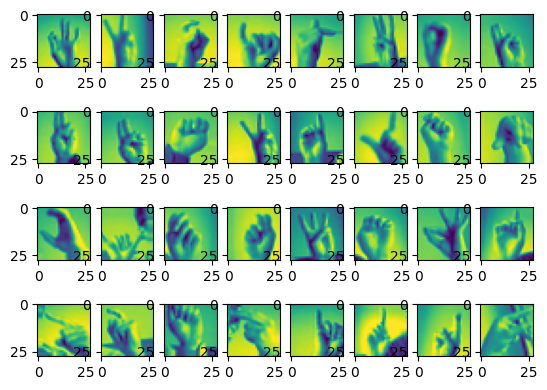

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
batch_size=32
img_iter = datagen.flow(x_train,y_train,batch_size=batch_size)

x, y = img_iter.next()
fig, ax = plt.subplots(nrows=4,ncols=8)
for i in range(batch_size):
    image = x[i]
    ax.flatten()[i].imshow(np.squeeze(image))
plt.show()

In [ ]:
datagen.fit(x_train)

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(img_iter,epochs=5,steps_per_epoch=len(x_train)/batch_size,verbose=1,validation_data=(x_valid,y_valid))

Epoch 1/5
857/857 [==============================] - 130s 152ms/step - loss: 0.0985 - accuracy: 0.9696 - val_loss: 0.0542 - val_accuracy: 0.9778
Epoch 2/5
857/857 [==============================] - 130s 151ms/step - loss: 0.0916 - accuracy: 0.9704 - val_loss: 0.0294 - val_accuracy: 0.9879
Epoch 3/5
857/857 [==============================] - 132s 154ms/step - loss: 0.0815 - accuracy: 0.9737 - val_loss: 0.0834 - val_accuracy: 0.9723
Epoch 4/5
857/857 [==============================] - 131s 153ms/step - loss: 0.0724 - accuracy: 0.9779 - val_loss: 0.0359 - val_accuracy: 0.9894
Epoch 5/5
857/857 [==============================] - 129s 150ms/step - loss: 0.0718 - accuracy: 0.9781 - val_loss: 0.0552 - val_accuracy: 0.9795


In [ ]:
#save the model
model.save('/content/drive/MyDrive/ASL Model')